In [1]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook 

In [2]:
location='/home/ds/notebooks/Data/Training50_winedata.csv'
df=pd.read_csv(location)
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rt.sulfur.dioxide
0,2083,7.5,0.33,0.32,11.1,0.036,25,119,0.99620,3.15,0.34,10.5,6,5.000000
1,3040,6.3,0.27,0.29,12.2,0.044,59,196,0.99782,3.14,0.40,8.8,6,7.681146
2,551,7.0,0.30,0.51,13.6,0.050,40,168,0.99760,3.07,0.52,9.6,7,6.324555
3,745,7.4,0.38,0.27,7.5,0.041,24,160,0.99535,3.17,0.43,10.0,5,4.898979
4,2957,8.1,0.12,0.38,0.9,0.034,36,86,0.99026,2.80,0.55,12.0,6,6.000000


In [3]:
x,y=df.shape
print "There are {0} columns with {1} observations".format(y,x)

There are 14 columns with 2037 observations


In [4]:
# remove duplicate columns
colsToRemove = []
columns = df.columns
for i in range(len(columns)-1):
    v = df[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,df[columns[j]].values):
            colsToRemove.append(columns[j])
df.drop(colsToRemove, axis=1, inplace=True)
#remove constant columns
colsToRemove = []
for col in df.columns:
    if df[col].std() == 0:
        colsToRemove.append(col)
df.drop(colsToRemove, axis=1, inplace=True)

In [5]:
df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rt.sulfur.dioxide
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,2530.610702,6.825626,0.266568,0.323201,6.277590,0.042211,34.718949,136.945508,0.993813,3.186348,0.481055,10.598771,5.929799,5.733111
std,1411.751450,0.753302,0.076738,0.094378,4.867284,0.009973,15.215444,41.424123,0.002862,0.138701,0.098560,1.222840,0.845931,1.360625
min,1.000000,4.400000,0.080000,0.000000,0.700000,0.012000,3.000000,21.000000,0.987110,2.790000,0.220000,8.400000,3.000000,1.732051
25%,1306.000000,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,107.000000,0.991520,3.090000,0.410000,9.500000,5.000000,4.898979
50%,2585.000000,6.800000,0.260000,0.310000,5.300000,0.042000,34.000000,133.000000,0.993500,3.180000,0.470000,10.500000,6.000000,5.830952
75%,3733.000000,7.300000,0.310000,0.380000,9.400000,0.049000,45.000000,166.000000,0.995800,3.280000,0.540000,11.450000,6.000000,6.708204
max,4897.000000,8.800000,0.485000,0.570000,20.800000,0.071000,78.000000,253.000000,1.001960,3.560000,0.760000,14.200000,9.000000,8.831761


In [6]:
trainLabels = df['quality']
trainFeatures = df.drop(['Unnamed: 0','quality'], axis=1)

In [7]:
from sklearn.decomposition import PCA, FactorAnalysis
pca = PCA(whiten=True)
pca_1=pca.fit(trainFeatures)

In [8]:
print(pca_1.explained_variance_ratio_) 
print "First conponment explains {0} of the variance".format(pca_1.explained_variance_ratio_[0])

[  9.23114096e-01   6.62317666e-02   9.82594485e-03   5.03184085e-04
   2.83130838e-04   2.25458647e-05   7.84944115e-06   4.74478320e-06
   4.17699402e-06   2.52735981e-06   3.30399431e-08   8.65061757e-11]
First conponment explains 0.923114096095 of the variance


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X = StandardScaler().fit_transform(trainFeatures)

In [11]:
pca = PCA(whiten=True)
pca_2=pca.fit(X)
print(pca_2.explained_variance_ratio_)  
print "First conponment explains {0}% of the variance after standardizing the features".\
format(round(pca_2.explained_variance_ratio_[0],2)*100)

[ 0.32313486  0.14278067  0.11761224  0.09680227  0.08264668  0.06678514
  0.06295004  0.04821556  0.03130429  0.02574372  0.00104026  0.00098427]
First conponment explains 32.0% of the variance after standardizing the features


In [12]:
df2=pd.DataFrame(pca_2.components_,columns=trainFeatures.columns)

In [13]:
df2[:2]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,rt.sulfur.dioxide
0,-0.076504,0.009361,-0.066408,-0.369281,-0.283607,-0.363017,-0.405851,-0.440266,0.074819,-0.051087,0.382334,-0.357954
1,0.461970,-0.053894,0.161736,0.153830,0.204496,-0.435252,-0.176710,0.250260,-0.393486,-0.046776,-0.234866,-0.443348


In [14]:
n = len(trainFeatures.columns) # set the number
pca = PCA(n_components = n)
X_pca = pca.fit(X).transform(X)

df_pca = pd.DataFrame(X_pca)
df_pca['y'] = trainLabels
print len(df_pca.columns)
df_pca.columns = [['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','y']]
df_pca.head()

13


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,y
0,0.008285,1.380110,0.021479,-1.693716,-0.242967,0.878550,-0.446381,-0.843978,-0.063589,-0.163554,-0.071852,-0.105878,6
1,-3.255996,-0.873454,0.173859,-1.015746,-0.801098,0.047015,-0.237325,0.280306,-0.657749,-0.122534,-0.124873,0.064642,6
2,-2.486343,1.153284,-0.595358,0.214890,0.745800,1.363525,-0.183800,0.882376,0.194505,-0.031681,0.035941,-0.090297,7
3,-0.222084,0.995513,0.769141,-1.270248,0.827241,0.147514,0.277777,-0.805113,-0.672987,0.139175,0.044393,-0.073920,5
4,1.593567,1.220968,-3.415741,0.682988,-0.174153,-2.012143,-0.567365,0.825013,0.405338,-0.081238,-0.124144,-0.100832,6


/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


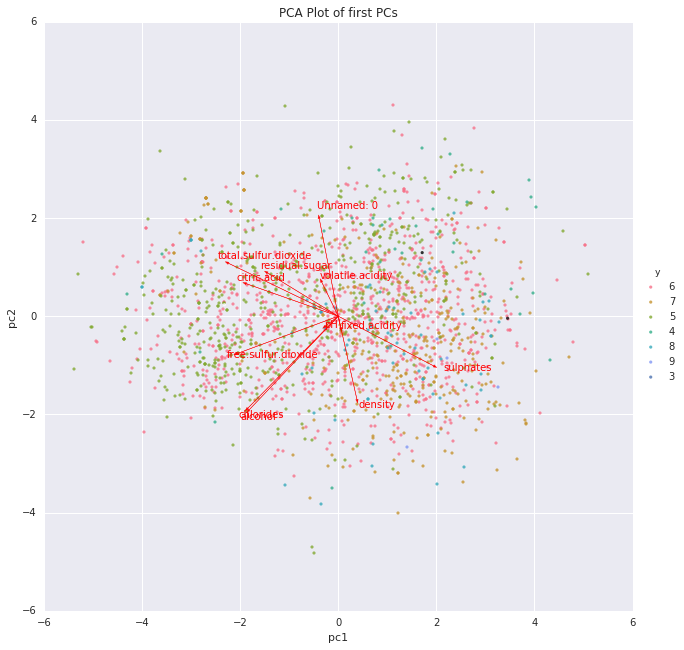

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.lmplot('pc1', 'pc2', data=df_pca, fit_reg = False, hue = 'y', size = 9, scatter_kws={"s": 10})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(X)[:,0]
ys = pca.transform(X)[:,1]
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(df.columns.values)[i], color='r')
#for i in range(len(xs)):
    #plt.text(xs[i]*1, ys[i]*1, list(trainFeatures.index)[i], color='b') # index number of each observations
plt.title('PCA Plot of first PCs')

In [45]:
df2.as_matrix()[0]

array([-0.07650383,  0.00936123, -0.06640837, -0.36928132, -0.28360673,
       -0.36301679, -0.40585072, -0.44026559,  0.07481939, -0.05108672,
        0.38233429, -0.35795376])

In [16]:
def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, np.diag(np.diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [17]:
df3=pd.DataFrame(varimax(pca.components_[:2]),columns=df2.columns)
df3.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,rt.sulfur.dioxide
0,-8.326673e-17,5.551115e-17,0.000000e+00,2.775558e-17,-1.647987e-17,1.387779e-17,5.551115e-17,-1.000000e+00,-4.163336e-17,-1.353084e-16,2.775558e-17,3.469447e-18
1,1.000000e+00,2.775558e-17,1.110223e-16,2.775558e-17,1.387779e-17,1.387779e-17,8.326673e-17,5.551115e-17,-2.081668e-17,-6.938894e-18,5.551115e-17,3.122502e-17


In [ ]:
sns.lmplot("x", "y", data=df, hue='dataset', fit_reg=False)

In [18]:
import pylab as pl

In [29]:
varimax(pca.components_[1:2])

array([[ 0.46197019, -0.05389449,  0.16173579,  0.1538299 ,  0.20449581,
        -0.43525158, -0.17670962,  0.25025951, -0.3934856 , -0.04677609,
        -0.2348663 , -0.44334765]])

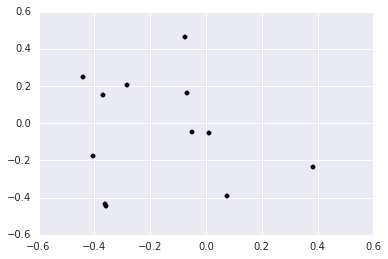

In [33]:
pl.scatter(varimax(pca.components_[:1]),varimax(pca.components_[1:2]),c='black')